# EDA US Stocks 2020-2024

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4DCCBD;
           font-size:120%;
           font-family:Proxima Nova;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
              📌 Skip to subsection Performing EDA for interactive graphics implemented using Plotly!
</p>
</div>

Update Notes v7: 

- added interactive graphics for price distribution and correlation matrix/heatmap.
- added html markdowns

*In construction, dealing with dash and plotly rendering issues currently*

[Kaggle data set used in the assignment](https://www.kaggle.com/datasets/dhavalpatel555/us-stock-market-2020-to-2024/data)

## Brief Introduction to The Stock Market

The stock market is one of the most fundamental aspects in global financial systems where investors and brokers are highly concerned with how certain companies and assets flow in respect to time. This assignment gives us an approach to compare various stocks and assets and provide detailed findings so that investors can adjust their buying and selling strategies accordingly to maximize profit and minimize risk of loss.

### Stocks and Assets

**Stocks**

We categorize stocks as shares of publicly-traded companies. They represent some form of ownership of the company. Buying shares of that company makes you one of the owners partially. Stock prices can fluctuate based on corporate related factors.

**Assets/Commodities**

Assets, or also known as commodities, hold value that represents some form of wealth that is tradeable as well. Investors alternatively trade assets to diversify their portfolios. Our data set includes assets like gold, platinum, as well as cryptocurrencies like bitcoin. Note that assets generally have higher volatility and are prone to sudden and massive fluctuations, increasing risks altogether.

## Research Objectives

- Optimize stock/asset selection for investment purposes
- Utilize visualization techniques to compare and assess leading stocks
- Analyze interrelationships among various stock options

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import plotly.graph_objects as go
import plotly_express as px

stocks = pd.read_csv("D:/Downloads/archive (1)/US Stock Market Dataset.csv")
stocks.head()

Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0    2/2/2024              2.079               NaN   
1           1    1/2/2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN     43,194.70   
1            73.82        577940.0        3.8535          NaN     43,081.40   
2            75.85        344490.0        3.9060          NaN     42,580.50   
3            77.82        347240.0        3.9110          NaN     42,946.20   
4            76.78        331930.0        3.8790          NaN     43,299.80   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0         42650  ...        5,89,498           10580        564.64   
1         47690  ...        5,81,600            9780        567.51   
2         56480  ...        5,78,020            9720        564.11   
3         55130  ...        5,84,680            9750        562.85   
4         45230  ...        5,78,800           13850        575.79   

   Netflix_Vol. Amazon_Price Amazon_Vol.  Meta_Price  Meta_Vol.  Gold_Price  \
0       4030000       171.81   117220000      474.99   84710000    2,053.70   
1       3150000       159.28    66360000      394.78   25140000    2,071.10   
2       4830000       155.20    49690000      390.14   20010000    2,067.40   
3       6120000       159.00    42290000      400.06   18610000    2,050.90   
4       6880000       161.26    42840000      401.02   17790000    2,034.90   

   Gold_Vol.  
0        NaN  
1   260920.0  
2   238370.0  
3   214590.0  
4     1780.0  

[5 rows x 39 columns]

In [2]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

## Data Cleaning

Data cleaning, in our case, is a process to observe incomplete or corrupted data and provide solutions to fix the data set. This approach doesn't alter existing data, but tries to use various methods to fill in missing data while retaining the overall integrity of data set.

In [3]:
#output basic info on the data set
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1013 non-null   int64  
 1   Date               1013 non-null   object 
 2   Natural_Gas_Price  1013 non-null   float64
 3   Natural_Gas_Vol.   1009 non-null   float64
 4   Crude_oil_Price    1013 non-null   float64
 5   Crude_oil_Vol.     990 non-null    float64
 6   Copper_Price       1013 non-null   float64
 7   Copper_Vol.        976 non-null    float64
 8   Bitcoin_Price      1013 non-null   object 
 9   Bitcoin_Vol.       1013 non-null   int64  
 10  Platinum_Price     1013 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1013 non-null   object 
 13  Ethereum_Vol.      1013 non-null   int64  
 14  S&P_500_Price      1013 non-null   object 
 15  Nasdaq_100_Price   1013 non-null   object 
 16  Nasdaq_100_Vol.    1012 

From the summary of the data set, there is an error where all of the columns are supposed to be numerical, but some are labelled as categorical data. We attempt to debug this by changing the data types manually.

In [4]:
def remove_comma(str): #removing commas in numbers
    return str.replace(",", "")

for col in stocks.columns:
    if stocks[col].dtypes == "object" and col != 'Date':
        stocks[col] = stocks[col].apply(remove_comma)
        stocks[col] = pd.to_numeric(stocks[col]) #changing categorical labels to numerical

stocks.info()
stocks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1013 non-null   int64  
 1   Date               1013 non-null   object 
 2   Natural_Gas_Price  1013 non-null   float64
 3   Natural_Gas_Vol.   1009 non-null   float64
 4   Crude_oil_Price    1013 non-null   float64
 5   Crude_oil_Vol.     990 non-null    float64
 6   Copper_Price       1013 non-null   float64
 7   Copper_Vol.        976 non-null    float64
 8   Bitcoin_Price      1013 non-null   float64
 9   Bitcoin_Vol.       1013 non-null   int64  
 10  Platinum_Price     1013 non-null   float64
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1013 non-null   float64
 13  Ethereum_Vol.      1013 non-null   int64  
 14  S&P_500_Price      1013 non-null   float64
 15  Nasdaq_100_Price   1013 non-null   float64
 16  Nasdaq_100_Vol.    1012 

Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0    2/2/2024              2.079               NaN   
1           1    1/2/2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN        43194.7   
1            73.82        577940.0        3.8535          NaN        43081.4   
2            75.85        344490.0        3.9060          NaN        42580.5   
3            77.82        347240.0        3.9110          NaN        42946.2   
4            76.78        331930.0        3.8790          NaN        43299.8   

   Bitcoin_Vol.  ...  Berkshire_Price  Berkshire_Vol.  Netflix_Price  \
0         42650  ...           589498           10580         564.64   
1         47690  ...           581600            9780         567.51   
2         56480  ...           578020            9720         564.11   
3         55130  ...           584680            9750         562.85   
4         45230  ...           578800           13850         575.79   

   Netflix_Vol.  Amazon_Price  Amazon_Vol.  Meta_Price  Meta_Vol.  Gold_Price  \
0       4030000        171.81    117220000      474.99   84710000      2053.7   
1       3150000        159.28     66360000      394.78   25140000      2071.1   
2       4830000        155.20     49690000      390.14   20010000      2067.4   
3       6120000        159.00     42290000      400.06   18610000      2050.9   
4       6880000        161.26     42840000      401.02   17790000      2034.9   

   Gold_Vol.  
0        NaN  
1   260920.0  
2   238370.0  
3   214590.0  
4     1780.0  

[5 rows x 39 columns]

Normally this practice is not encouraged when working with data that includes actual categorical data, we implemented this approach because we are highly aware that the data set composes of numerical data only. `Date` will remain as `object` so that after we performed KNN imputation we are able to merge. There are 1013 samples from the population.

((7,), <Axes: >)

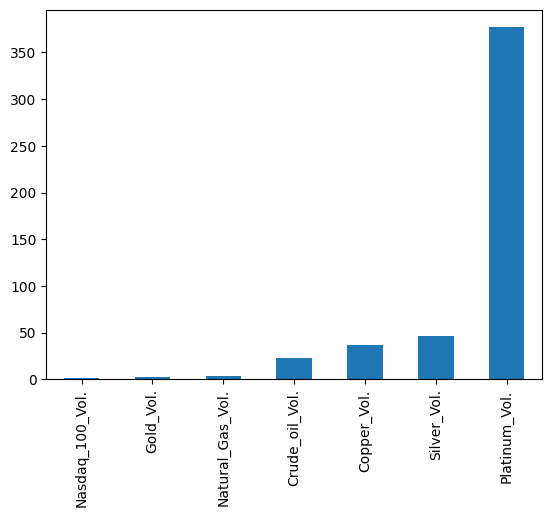

In [5]:
missing = stocks.isnull().sum() #sum up all the missing columns in a row
missing = missing[missing>0] #only shows missing data that are prevalent
missing.sort_values(inplace = True) #ordered sort

missing.shape, missing.plot.bar()

Evidently, there are 7 stocks / assets that have missing data with Platinum as the leading asset for most missing data. A newsletter claims that investors are losing interest in the metal due to global shortage of platinum. One of the potential reasons that may have caused the crisis includes frequent electricity cuts on South Africa, the country with the most platinum output ([Source](https://www.nasdaq.com/articles/why-does-platinum-keep-failing)). Nonetheless, Our approach to handling missing data is to perform K-Nearest Neighbours Algorithm (KNN) and fill up data that is missing.

### [K-Nearest Neighbours Algorithm (KNN)](https://www.ibm.com/topics/knn)

KNN is a supervised, non-parametric machine learning model that groups data with similar characteristics, providing predictions based on nearest euclidean distance (Note that not every classification task uses euclidean distance, alternative metrics are available).

- supervised: Series of output data are first specified prior to performing actual predictions
- non-parametric: Makes limited assumptions about the underlying data

For our case, we used KNN imputation techniques to fill in missing data by considering multiple variables and estimating distances from their nearest neighbouring data.

We start off by selecting columns with numerical data only.

In [6]:
numeric_columns = stocks.select_dtypes(include = [np.number, 'float']).columns.to_list()
selected_stocks = stocks[numeric_columns]

Furthermore, we apply KNN Imputer to fill in missing data:

In [7]:
knn = KNNImputer(n_neighbors = 5)
filled_stocks = knn.fit_transform(selected_stocks)
filled_df = pd.DataFrame(filled_stocks, columns = numeric_columns)

In [8]:
filled_df.head()

Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0         0.0              2.079          103180.0            72.28   
1         1.0              2.050          161340.0            73.82   
2         2.0              2.100          142860.0            75.85   
3         3.0              2.077          139750.0            77.82   
4         4.0              2.490            3590.0            76.78   

   Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
0        341868.0        3.8215      57098.0        43194.7       42650.0   
1        577940.0        3.8535      34040.0        43081.4       47690.0   
2        344490.0        3.9060      89628.0        42580.5       56480.0   
3        347240.0        3.9110      78758.0        42946.2       55130.0   
4        331930.0        3.8790      76524.0        43299.8       45230.0   

   Platinum_Price  ...  Berkshire_Price  Berkshire_Vol.  Netflix_Price  \
0           901.6  ...         589498.0         10580.0         564.64   
1           922.3  ...         581600.0          9780.0         567.51   
2           932.6  ...         578020.0          9720.0         564.11   
3           931.7  ...         584680.0          9750.0         562.85   
4           938.3  ...         578800.0         13850.0         575.79   

   Netflix_Vol.  Amazon_Price  Amazon_Vol.  Meta_Price   Meta_Vol.  \
0     4030000.0        171.81  117220000.0      474.99  84710000.0   
1     3150000.0        159.28   66360000.0      394.78  25140000.0   
2     4830000.0        155.20   49690000.0      390.14  20010000.0   
3     6120000.0        159.00   42290000.0      400.06  18610000.0   
4     6880000.0        161.26   42840000.0      401.02  17790000.0   

   Gold_Price  Gold_Vol.  
0      2053.7   190762.0  
1      2071.1   260920.0  
2      2067.4   238370.0  
3      2050.9   214590.0  
4      2034.9     1780.0  

[5 rows x 38 columns]

In [9]:
filled_df.isnull().sum()

Unnamed: 0           0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64

As we can see, the missing columns in the data set are repaired and filled through clustering using KNN. Now we just have to merge this section of the data with the `Date`.

In [10]:
non_numerical_columns = stocks.select_dtypes(exclude=['number']).columns #select columns that aren't numerical
if len(non_numerical_columns) > 0:
    final_imputed_data = pd.concat([stocks[non_numerical_columns], filled_df], axis=1)
else:
    final_imputed_data = filled_df

final_imputed_data.head()

Date  Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  \
0    2/2/2024         0.0              2.079          103180.0   
1    1/2/2024         1.0              2.050          161340.0   
2  31-01-2024         2.0              2.100          142860.0   
3  30-01-2024         3.0              2.077          139750.0   
4  29-01-2024         4.0              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  \
0            72.28        341868.0        3.8215      57098.0        43194.7   
1            73.82        577940.0        3.8535      34040.0        43081.4   
2            75.85        344490.0        3.9060      89628.0        42580.5   
3            77.82        347240.0        3.9110      78758.0        42946.2   
4            76.78        331930.0        3.8790      76524.0        43299.8   

   Bitcoin_Vol.  ...  Berkshire_Price  Berkshire_Vol.  Netflix_Price  \
0       42650.0  ...         589498.0         10580.0         564.64   
1       47690.0  ...         581600.0          9780.0         567.51   
2       56480.0  ...         578020.0          9720.0         564.11   
3       55130.0  ...         584680.0          9750.0         562.85   
4       45230.0  ...         578800.0         13850.0         575.79   

   Netflix_Vol.  Amazon_Price  Amazon_Vol.  Meta_Price   Meta_Vol.  \
0     4030000.0        171.81  117220000.0      474.99  84710000.0   
1     3150000.0        159.28   66360000.0      394.78  25140000.0   
2     4830000.0        155.20   49690000.0      390.14  20010000.0   
3     6120000.0        159.00   42290000.0      400.06  18610000.0   
4     6880000.0        161.26   42840000.0      401.02  17790000.0   

   Gold_Price  Gold_Vol.  
0      2053.7   190762.0  
1      2071.1   260920.0  
2      2067.4   238370.0  
3      2050.9   214590.0  
4      2034.9     1780.0  

[5 rows x 39 columns]

In [11]:
final_imputed_data.to_csv('final_imputed.csv', index=False)

## Performing EDA

### Preliminary Analysis

We will create a dataframe `stocks_updated` and drop the id column which will left us with the dates, prices as well as volumes for each stocks and assets.

In [12]:
stocks_updated = final_imputed_data #updated data set
stocks_updated.drop(['Unnamed: 0'], axis = 1, inplace = True)
stocks_updated.head()

Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0    2/2/2024              2.079          103180.0            72.28   
1    1/2/2024              2.050          161340.0            73.82   
2  31-01-2024              2.100          142860.0            75.85   
3  30-01-2024              2.077          139750.0            77.82   
4  29-01-2024              2.490            3590.0            76.78   

   Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
0        341868.0        3.8215      57098.0        43194.7       42650.0   
1        577940.0        3.8535      34040.0        43081.4       47690.0   
2        344490.0        3.9060      89628.0        42580.5       56480.0   
3        347240.0        3.9110      78758.0        42946.2       55130.0   
4        331930.0        3.8790      76524.0        43299.8       45230.0   

   Platinum_Price  ...  Berkshire_Price  Berkshire_Vol.  Netflix_Price  \
0           901.6  ...         589498.0         10580.0         564.64   
1           922.3  ...         581600.0          9780.0         567.51   
2           932.6  ...         578020.0          9720.0         564.11   
3           931.7  ...         584680.0          9750.0         562.85   
4           938.3  ...         578800.0         13850.0         575.79   

   Netflix_Vol.  Amazon_Price  Amazon_Vol.  Meta_Price   Meta_Vol.  \
0     4030000.0        171.81  117220000.0      474.99  84710000.0   
1     3150000.0        159.28   66360000.0      394.78  25140000.0   
2     4830000.0        155.20   49690000.0      390.14  20010000.0   
3     6120000.0        159.00   42290000.0      400.06  18610000.0   
4     6880000.0        161.26   42840000.0      401.02  17790000.0   

   Gold_Price  Gold_Vol.  
0      2053.7   190762.0  
1      2071.1   260920.0  
2      2067.4   238370.0  
3      2050.9   214590.0  
4      2034.9     1780.0  

[5 rows x 38 columns]

We follow up with descriptive statistics such as mean, standard deviation, min and max values as well as the quartiles.

In [13]:
stocks_updated.describe()

Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  Crude_oil_Vol.  \
count        1013.000000       1013.000000      1013.000000    1.013000e+03   
mean            3.726667     128966.823297        69.853475    3.557656e+05   
std             1.943030      63947.240698        21.986697    1.848100e+05   
min             1.482000       1200.000000       -37.630000    1.702000e+04   
25%             2.447000      88680.000000        54.760000    2.744100e+05   
50%             2.880000     125390.000000        72.910000    3.442200e+05   
75%             4.805000     164650.000000        82.810000    4.221500e+05   
max             9.647000     381970.000000       123.700000    1.770000e+06   

       Copper_Price    Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
count   1013.000000    1013.000000    1013.000000  1.013000e+03   
mean       3.726843   38815.551826   29215.594965  4.924137e+07   
std        0.646524   39046.789909   15115.630151  3.251389e+08   
min        2.100500      10.000000    4826.000000  2.600000e+02   
25%        3.408000     420.000000   17180.100000  7.142000e+04   
50%        3.800500   39260.000000   27634.900000  1.288800e+05   
75%        4.251500   72116.000000   40914.800000  3.860000e+05   
max        4.937500  176040.000000   67527.900000  4.470000e+09   

       Platinum_Price  Platinum_Vol.  ...  Berkshire_Price  Berkshire_Vol.  \
count     1013.000000    1013.000000  ...      1013.000000     1013.000000   
mean       978.398371   10130.446199  ...    424871.307009     2918.400790   
std        108.577041    8752.610404  ...     82654.637405     2715.637488   
min        595.200000       0.000000  ...    240000.000000      120.000000   
25%        909.600000    2260.000000  ...    349540.000000      760.000000   
50%        969.700000    8380.000000  ...    432000.000000     2040.000000   
75%       1036.900000   16950.000000  ...    481955.000000     4090.000000   
max       1297.100000   42830.000000  ...    589498.000000    13850.000000   

       Netflix_Price  Netflix_Vol.  Amazon_Price   Amazon_Vol.   Meta_Price  \
count    1013.000000  1.013000e+03   1013.000000  1.013000e+03  1013.000000   
mean      422.035479  7.012043e+06    137.426209  7.452566e+07   252.151046   
std       119.765870  6.788094e+06     27.321896  3.376809e+07    72.949246   
min       166.370000  1.140000e+06     81.820000  2.162000e+07    88.910000   
25%       338.630000  3.780000e+06    114.770000  5.192000e+07   195.210000   
50%       431.600000  5.380000e+06    142.300000  6.515000e+07   262.010000   
75%       509.640000  7.890000e+06    161.060000  8.683000e+07   313.190000   
max       691.690000  1.333900e+08    186.570000  3.113500e+08   474.990000   

          Meta_Vol.   Gold_Price      Gold_Vol.  
count  1.013000e+03  1013.000000    1013.000000  
mean   2.504895e+07  1839.171668  189422.768016  
std    1.635122e+07   119.066900  103907.190513  
min    5.470000e+06  1477.900000       0.000000  
25%    1.612000e+07  1763.800000  143050.000000  
50%    2.107000e+07  1835.800000  181200.000000  
75%    2.903000e+07  1936.600000  231490.000000  
max    2.304100e+08  2089.700000  813410.000000  

[8 rows x 37 columns]

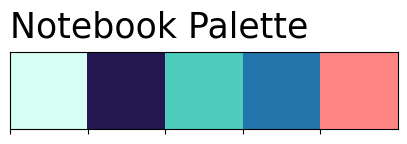

In [14]:
sns.palplot(['#D6FFF6', '#231651', '#4DCCBD','#2374AB', '#FF8484'])
plt.title("Notebook Palette",loc='left',fontname='sans-serif',fontsize=25, y=1.1)
plt.show()

We don't have much detail on the stock market if we analyze based on this information alone. We decide to plot individual histograms and line plots to observe how the prices of each stocks and assets fluctuate in respect to time. We will use seaborn for a more aesthetically pleasing visualization.

In [15]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

price_columns_new = [col for col in stocks_updated.columns if 'Price' in col] #all the prices of stocks
print(len(price_columns_new))
header_names = list(stocks_updated[price_columns_new].columns)

selected_stock = 'Bitcoin_Price'  # Default selected stock

fig = go.Figure(data=[go.Histogram(x=stocks_updated['Bitcoin_Price'], marker_color='#4DCCBD')])

fig.update_layout(
    title={
        'text' : "Distribution of Prices 2020-2024",
        'xanchor' : 'center',
        'x' : 0.5,
    },
    xaxis_title='Price',
    yaxis_title='Frequency',
    template="plotly_white",
    font_family="Proxima Nova",
    font_color="#2374AB",
    height=700,
    autosize=True,
    margin=dict(t=100, b=0, l=0, r=0),
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    ),
)

options = []
for col in price_columns_new:
    option = dict(
        args=[{'x': [stocks_updated[col]]}],  
        label=col.split("_")[0],  # Extracting the stock name from the column name
        method="restyle"
    )
    options.append(option)
    
fig.update_layout(
    updatemenus=[
        dict(
            type = "dropdown",
            direction = "down",
            buttons=options,
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.08,
            yanchor="top"
        ),
    ]
)
fig.show()

19


We attempt to observe the distributions of prices for each stock. In general, some of the stocks don't necessarily follow a normal or log normal distribution curve. Take natural gas for example, the curve is skewed greatly towards the right, which indicate a significant negative skewness.

Looking at the kurtosis of our data, bitcoin, Google, Berkshire, and Amazon tend to be platykurtic, which means it has higher risk of outlier. Assets such as platinum tend to be leptocurtic, which means it has lower risk of outlier.

However, this amount of information is lacking detail on explaining how the stocks perform in respect to time. Hence, we need other methods to visualize, one classic example is the time series plot. We will include bollinger bands and moving average lines to determine it's volatility, in other words, the stability of the stocks.

In [16]:
data = stocks_updated["Date"]

#define a function to handle different date formats
def parse_date(date_str):
  try:
    # Try parsing with format "%m/%d/%Y" (DD-MM-YYYY)
    return pd.to_datetime(date_str, format="%d/%m/%Y")
  except ValueError:
    # If parsing fails, try format "%d-%m-%Y" (DD-MM-YYYY)
    return pd.to_datetime(date_str, format="%d-%m-%Y")

#parse the dates using the function
result = pd.to_datetime([parse_date(date) for date in data])

stocks_updated["Date"] = result

In [31]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

price_columns_new = [col for col in stocks_updated.columns if 'Price' in col] #all the prices of stocks
header_names = list(stocks_updated[price_columns_new].columns)

price_series = stocks_updated["Bitcoin_Price"]

rolling_mean = price_series.rolling(window=20).mean() 
rolling_std = price_series.rolling(window=20).std()

upper_band = rolling_mean + (2 * rolling_std)
lower_band = rolling_mean - (2 * rolling_std)

def scatterinfo(price):
    rolling_mean = price.rolling(window=20).mean() 
    rolling_std = price.rolling(window=20).std()

    upper_band = rolling_mean + (2 * rolling_std)
    lower_band = rolling_mean - (2 * rolling_std)
    return [lower_band, upper_band, upper_band, rolling_mean, price]

#Though not encouraged to have same names for function and global variables!

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = list(stocks_updated["Date"]), 
    y = lower_band, 
    name = 'Lower Band', 
    line = dict(color='#FF8484', width=1, dash = 'dash')))
fig.add_trace(go.Scatter(
    x = list(stocks_updated["Date"]),
    y = upper_band, 
    name = 'Bounded Area', 
    fill = 'tonexty', 
    line_color = "#D6FFF6"))
fig.add_trace(go.Scatter(
    x = list(stocks_updated["Date"]), 
    y = upper_band, 
    name = 'Upper Band', 
    line = dict(color='#4DCCBD', width=1, dash = 'dash')))
fig.add_trace(go.Scatter(
    x = list(stocks_updated["Date"]), 
    y = rolling_mean, 
    name = '20 day SMA', 
    line = dict(color='#2374AB', width=2)))
fig.add_trace(go.Scatter(
    x = list(stocks_updated["Date"]), 
    y = price_series, 
    name = 'Price', 
    line = dict(color='#231651', width=1)))

fig.update_layout(
    title={
        'text' : "%s Overview 2020-2024" % "Bitcoin_Price".replace("_", " "),
        'xanchor' : 'center',
        'x' : 0.5,
    },
    xaxis_title='Month',
    yaxis_title='Closing Price',
    template="plotly_white")

options = []
for col in price_columns_new:
    option = dict(
        args=[{'y': scatterinfo(stocks_updated[col])}],  
        label=col.split("_")[0],  # Extracting the stock name from the column name
        method="restyle"
    )
    options.append(option)
    
fig.update_layout(
    updatemenus=[
        dict(
            type = "dropdown",
            direction = "down",
            buttons=options,
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.2,
            xanchor="left",
            y=1.12,
            yanchor="top"
        ),
    ]
)
fig.update_layout(
    font_family="Proxima Nova",
    font_color="#2374AB",
    height=700,
    autosize=True,
    margin=dict(t=100, b=0, l=0, r=0),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    label="1m",
                    step="month",
                    stepmode="backward"),
                dict(count=6,
                    label="6m",
                    step="month",
                    stepmode="backward"),
                dict(count=1,
                    label="YTD",
                    step="year",
                    stepmode="todate"),
                dict(count=1,
                    label="1y",
                    step="year",
                    stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.update_xaxes(showspikes=True, spikecolor="#2374AB", spikesnap="cursor", spikemode="across", spikethickness=1)
fig.update_yaxes(showspikes=True, spikecolor="#2374AB", spikethickness=1)
fig.update_layout(spikedistance=1000, hoverdistance=100)

fig.show()

19


Bollinger band is a technical analysis tool used in the financial markets to assess an asset's volatility and identify potential buying or selling opportunities. Imagine a price channel with three lines. The middle line is the moving average price, top and bottom lines show how far the price typically strays from that moving average. Wider bands mean higher volatility, narrow bands mean lower volatility. Bollinger Bands help traders gauge if a price is high (overbought) or low (oversold) compared to its recent history.

The S&P 500's drop in January 2020 is the result of global impacted factors such as the COVID-19 Pandemic, Russia and Saudi Arabia were also engaged in an oil price war, driving down energy prices. These factors combined to cause a decline in the S&P 500, but it was the larger pandemic-driven crash that came later in 2020 that had the most significant impact.

In 2020, the gold price was more volatile and experienced uptrend as we can see the bands are wider for a few reasons:

- During the early stages of the COVID-19 Pandemic, investors often seek safe-haven assets like gold. This surge in demand can cause gold prices to become more volatile.
- Governments worldwide pumped massive amounts of money into economies in 2020 to ward off recession. This can weaken the value of currencies, making gold, a non-currency asset, more attractive. 
- Pandemic-related disruptions in gold mining and transportation could have also contributed to volatility in July 2020. Limited supply with high demand can cause prices to rise erratically.

It is important to relate major global events that are tied to the stock/asset to seek more information before trading.

In [ ]:
correlation_matrix = stocks_updated[price_columns_new].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the upper triangle values to NaN (or any other value you prefer)
correlation_matrix[mask] = np.nan

fig = px.imshow(correlation_matrix, color_continuous_scale = "Blues", aspect = "auto")

fig.update_layout(
    title={
            'text' : "Correlation Matrix of US Stocks",
            'xanchor' : 'center',
            'x' : 0.72,
            'y' : 0.9
        },
    font_family="Proxima Nova",
    font_color="#2374AB",
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=100, b=0, l=0, r=0),
    template="simple_white"
)

annotations = [
    "We shouldn't put all our eggs into a basket,",
    "instead we distribute through multiple baskets to minimize loss.",
    "Similarly, investing in multiple businesses and assets is safer",
    "than risking it all and putting your entire savings",
    "into one business/asset."
]

for i, annotation in enumerate(annotations):
    fig.add_annotation(
        xref="paper", yref="paper",
        x=1.0, y=0.95 - i * 0.025,
        xanchor="right", yanchor="bottom",
        text=annotation,
        font=dict(color="#4DCCBD", size=15),
        showarrow=False
    )

fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

fig.show()

## Correlation Between Stocks and Assets

We shouldn't put all our eggs into a basket, instead we distribute through multiple baskets to minimize loss. Similarly, investing in multiple businesses and assets is safer than risking it all and putting your entire savings into one business/asset. However, one might be curious which combinations of stocks and assets should i invest in order to generate maximum earnings?

The answer would be to look at the correlation matrix. A correlation matrix, also known as a correlation heatmap, plots how closely correlated each variables are. For an example, take a look at Microsoft. **We can see that it's highly correlated to Apple, Nasdaq, S&P, Nvidia, and Google.** 

These are the set of companies that we can recommend investing in if your primary choice is Microsoft. Conversely, we recommend avoiding the same set of companies if Microsoft stocks are underperforming, instead invest in stocks/assets that are inversely correlated. Analyzing in this way allows us to know what trends of the stock prices for different companies may occur so investors can adjust their trading strategies accordingly.

## Granger Causality and Kaiser-Meyer-Olkin (KMO) Tests

We investigate more influences on measuring the predictability of stocks. There's a popular saying in statistics where correlation does not imply causation. This means that when two variables behave similarly does not mean one variable causes the other. We have to look at the causes separately. This is why we adopt the Granger Causality Test to examine whether one time series can actually affect another time series. 

Our second investigation is to examine sampling adequacy for our data set, which is the overall goodness of our process in sampling data. We adopt the Kaiser-Meyer-Olkin (KMO) Test to measure the proportion of variance. This test is also used to determine whether our samples are suitable for factor analysis.

### Statistical Prerequisite: ADF and KPSS Cross Testing for Stationary Time Series 

Granger Causality Test requires a statistical prerequisite where the data set is stationary. To verify this prerequisite, we carry out the Augmented Dickey Fuller (ADF) and Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests. We set up the Null Hypothesis $H_0$ and Alternative Hypothesis $H_1$ for time series of Microsoft and Apple's prices:

| Hypothesis Testing | ADF | KPSS |
| - | - | - |
| $H_0$ | Time series does not have a unit root (not stationary) | Time series have a unit root (stationary) |
| $H_1$ | Time series have a unit root (stationary) | Time series does not have a unit root (not stationary) |

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print("ADF Test for Microsoft time series")
adf_test(stocks_updated['Microsoft_Price'])
print("ADF Test for Apple time series")
adf_test(stocks_updated['Apple_Price'])

ADF Test for Microsoft time series
ADF Statistics: -1.634632
p-value: 0.465067
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
ADF Test for Apple time series
ADF Statistics: -0.808153
p-value: 0.816716
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


ADF test states that the P-value of both time series are significantly higher than $\alpha$ = 0.05. Results imply that we don't have enough evidence to reject $H_0$, so the time series are not stationary.

In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(df):    
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

print("KPSS Test for Microsoft time series")
kpss_test(stocks_updated['Microsoft_Price'])
print("KPSS Test for Apple time series")
kpss_test(stocks_updated['Apple_Price'])

KPSS Test for Microsoft time series
KPSS Statistic: 3.2772227853967326
p-value: 0.01
num lags: 19
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test for Apple time series
KPSS Statistic: 3.936620945534801
p-value: 0.01
num lags: 19
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


C:\Users\ckhin\AppData\Local\Temp\ipykernel_22028\3120907347.py:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\ckhin\AppData\Local\Temp\ipykernel_22028\3120907347.py:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




KPSS Test produces similar results where we have enough evidence to reject $H_0$, and the alternative hypothesis suggests that the time series is not stationary. Cross testing of ADF and KPSS show consistent findings where we have to apply differencing to the data set.

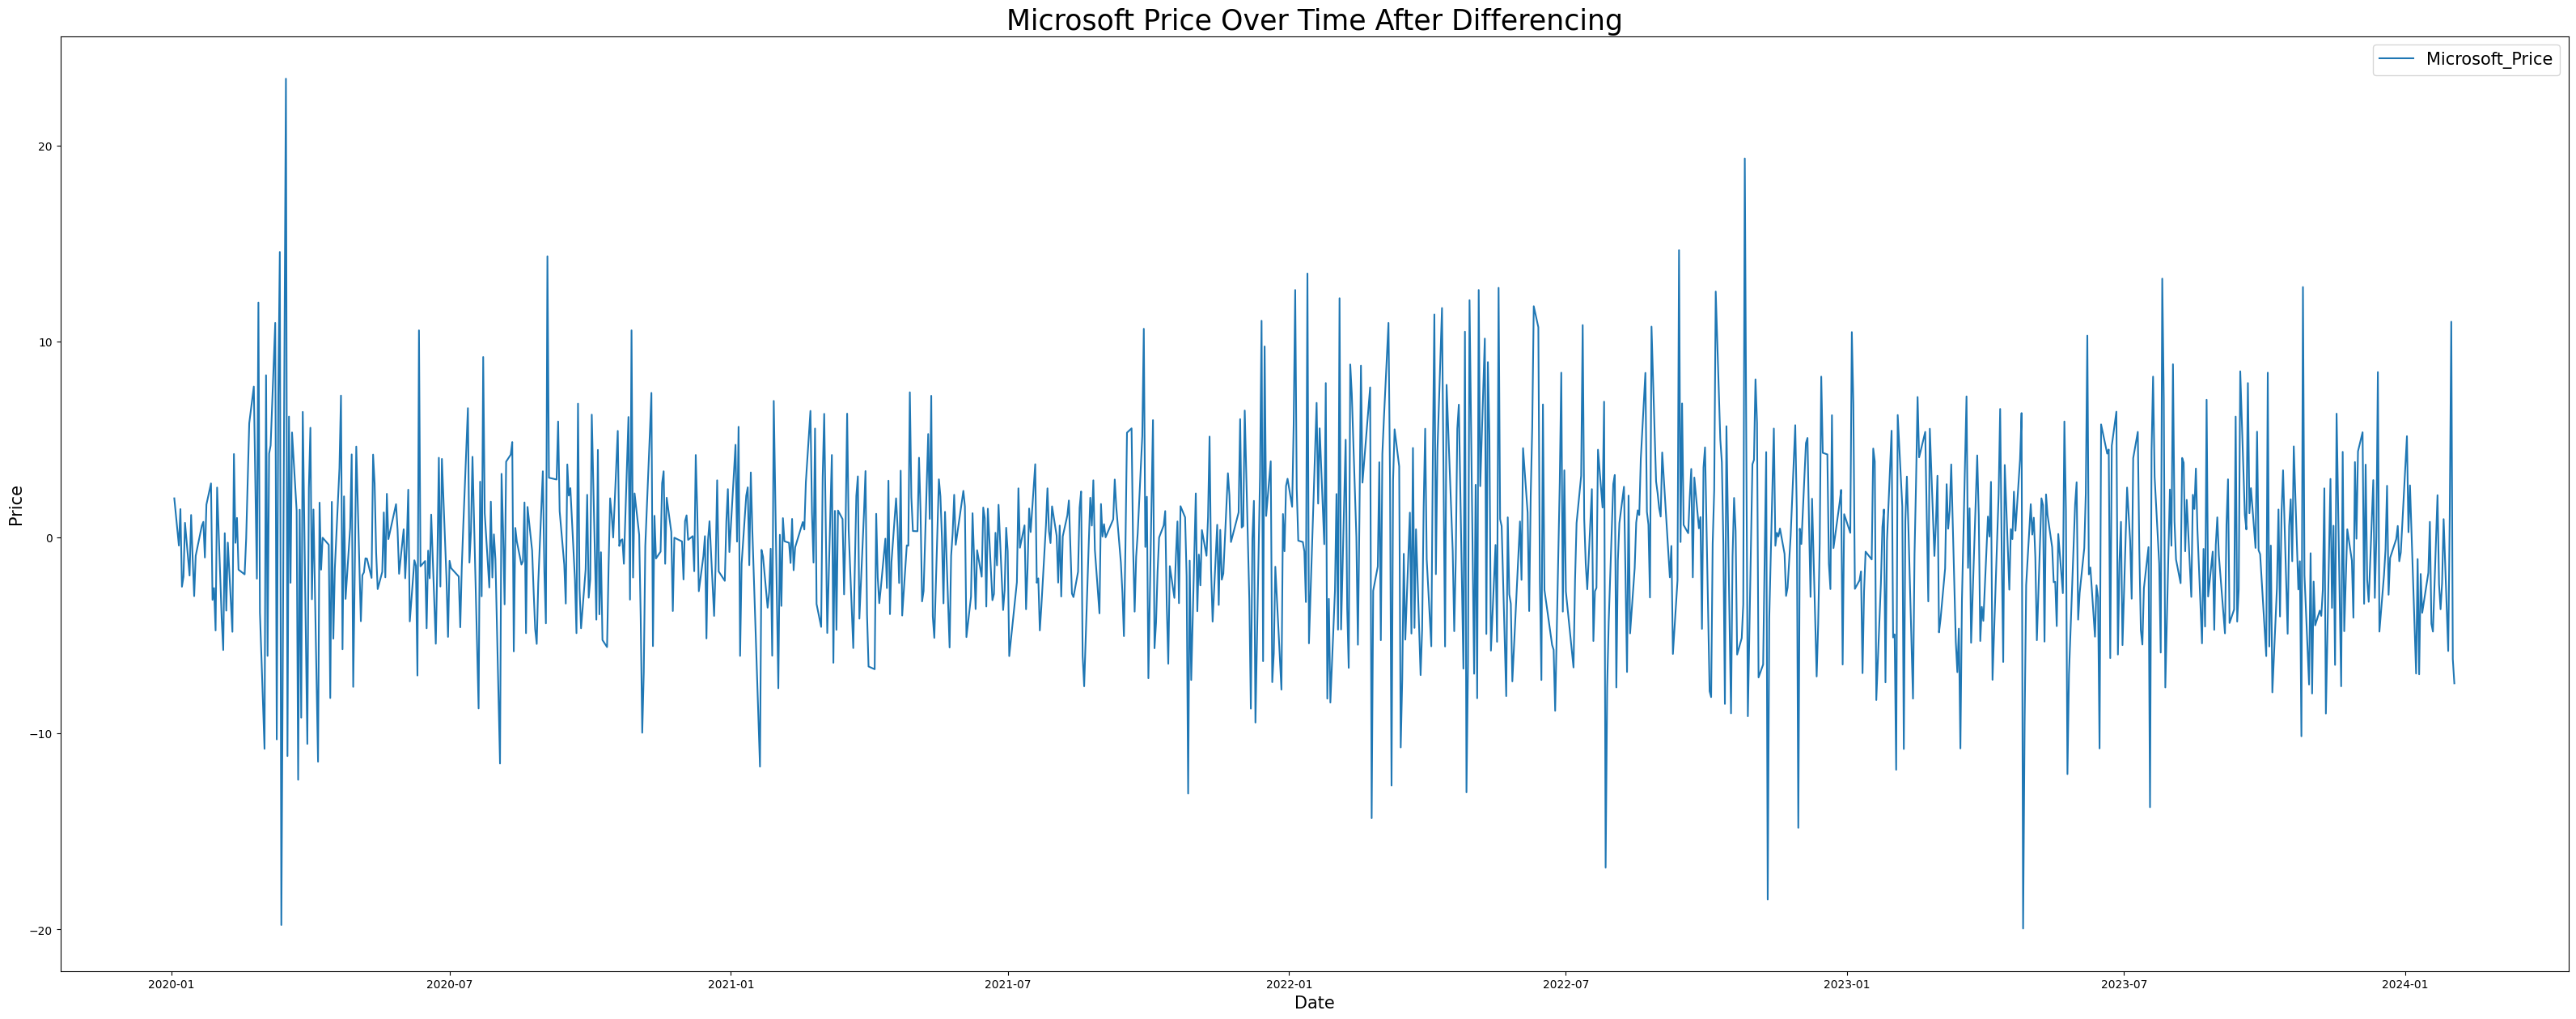

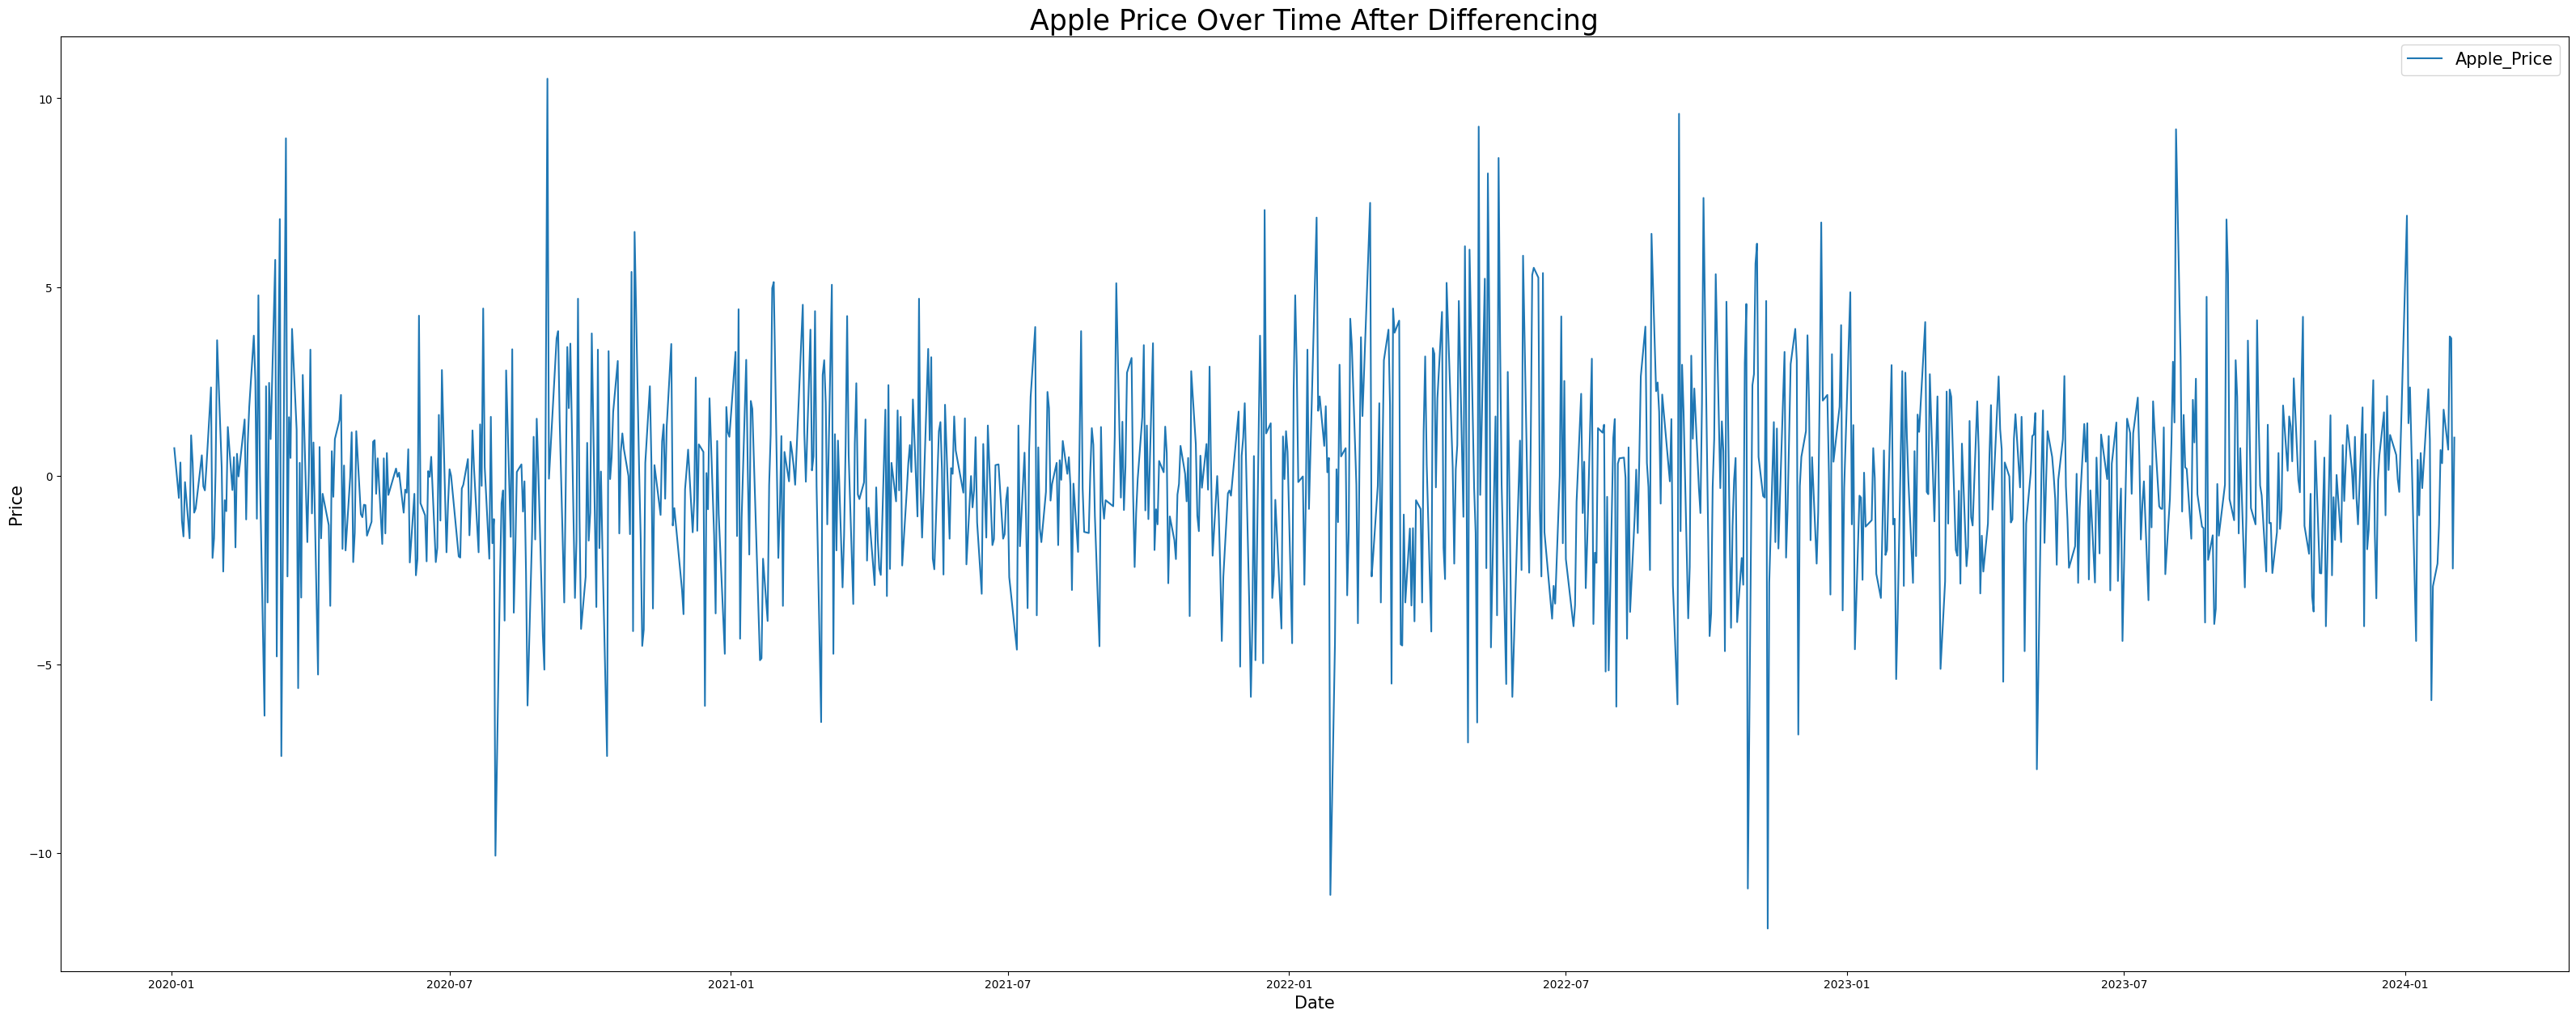

ADF Statistics: -10.248201
p-value: 0.000000
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
ADF Statistics: -32.624320
p-value: 0.000000
Critical values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
KPSS Statistic: 0.12192804433558503
p-value: 0.1
num lags: 7
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Statistic: 0.06239364742158281
p-value: 0.1
num lags: 6
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


C:\Users\ckhin\AppData\Local\Temp\ipykernel_22028\3120907347.py:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\ckhin\AppData\Local\Temp\ipykernel_22028\3120907347.py:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [ ]:
Microsoft_transformed = stocks_updated['Microsoft_Price'].diff().dropna()
Apple_transformed = stocks_updated['Apple_Price'].diff().dropna()
date_series = stocks_updated['Date'][:-1]  #adjusting date series since differencing results in one less element from the original series

plt.figure(figsize=(40, 15))
plt.plot(date_series, Microsoft_transformed, label='Microsoft_Price')
plt.legend(fontsize=15)
plt.title('Microsoft Price Over Time After Differencing', fontsize=25)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

plt.figure(figsize=(40, 15))
plt.plot(date_series, Apple_transformed, label='Apple_Price')
plt.legend(fontsize=15)
plt.title('Apple Price Over Time After Differencing', fontsize=25)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

adf_test(Microsoft_transformed)
adf_test(Apple_transformed)
kpss_test(Microsoft_transformed)
kpss_test(Apple_transformed)

After differencing, tests show that the adjusted time series do have a unit root, thus they're stationary. We can now move on to the Granger Causality Test to examine predictability.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

time_series_data = pd.concat([Microsoft_transformed, Apple_transformed], axis=1)
time_series_data.columns = ['Microsoft_Price', 'Apple_Price']

max_lags = 5
granger_test_results = grangercausalitytests(time_series_data, maxlag=max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4970  , p=0.0342  , df_denom=1008, df_num=1
ssr based chi2 test:   chi2=4.5104  , p=0.0337  , df=1
likelihood ratio test: chi2=4.5004  , p=0.0339  , df=1
parameter F test:         F=4.4970  , p=0.0342  , df_denom=1008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8758  , p=0.0568  , df_denom=1005, df_num=2
ssr based chi2 test:   chi2=5.7803  , p=0.0556  , df=2
likelihood ratio test: chi2=5.7638  , p=0.0560  , df=2
parameter F test:         F=2.8758  , p=0.0568  , df_denom=1005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1878  , p=0.0231  , df_denom=1002, df_num=3
ssr based chi2 test:   chi2=9.6303  , p=0.0220  , df=3
likelihood ratio test: chi2=9.5847  , p=0.0224  , df=3
parameter F test:         F=3.1878  , p=0.0231  , df_denom=1002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5389  , p=0.

c:\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning:

verbose is deprecated since functions should not print results



Based on the results, the test suggests that previous 1st, 3rd, 4th lagged terms of stock prices for Apple Granger causes Microsoft, which exhibits significant predictability for Microsoft prices. This test can also be applied to other stocks.

In [ ]:
#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

kmo_all, kmo_model = calculate_kmo(stocks_updated[price_columns_new])
bartlett_sphericity_test_stat, p_value = calculate_bartlett_sphericity(stocks_updated[price_columns_new])

kmo_model, bartlett_sphericity_test_stat, p_value

(0.8080231492995689, 42619.696698639986, 0.0)

From the results, the kmo value is above 0.8, indicating that our sampling method is meritorious. We also conducted the bartlett sphericity test and have enough evidence to support that our correlation matrix is not an identity matrix, and is suitable for structure detection.

## Conclusion/Findings

Results shown that just only descriptive statistics is not enough. Skewness and kurtosis values and tell us briefly how the distributions of prices look like on a surface level, but it is not accurate. In many situations the volatility of stocks have to be assessed using Bollinger Bands through time series plots. Cases like overbuying and overselling are tied to major global events around that time. Correlation heatmaps are essential to figure out which sets of companies/assets we can buy or sell, further adjusting our strategies to maximize profit and minimize risk of loss.

We also assessed causality between stocks/assets by conducting a Granger Causality Test. Note that additional ADF and KPSS test were done prior to determine stationary time series. After applying differencing to Apple and Microsoft prices, we concluded that the 1st, 3rd and 4th lagged terms of  Apple Granger causes Microsoft. Moreover, KMO test shown that our sampling methods are meritorious, indicating that the sampling of the data set is adequate for factor analysis. Bartlett Sphericty test suggests that the correlation matrix is valid.